# Zillow Price (Zestimate)

Project Link: https://www.kaggle.com/competitions/zillow-prize-1

In this million-dollar competition, participants will develop an algorithm that makes predictions about the future sale prices of homes. The contest is structured into two rounds, the qualifying round which opens May 24, 2017 and the private round for the 100 top qualifying teams that opens on Feb 1st, 2018. In the qualifying round, you’ll be building a model to improve the Zestimate residual error. In the final round, you’ll build a home valuation algorithm from the ground up, using external data sources to help engineer new features that give your model an edge over the competition.

This challenge aims to predict the sales prices of houses and improve upon the log error between the actual home sales and predicted home sales prices, so we can treat this challenge as ***Regression*** problem and use a Supervised Learning model as it has labeled data.

# Import Statements

In [19]:
import numpy as np
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import missingno as ms

%matplotlib inline

# Data Loading and Initial Look

In [20]:
train = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv', )
props = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/property_2016.csv')

In [21]:
print('Shape of Training Set (2016): ',train.shape)
print('Shape of Properties (2016): ',props.shape)

Shape of Training Set (2016):  (90275, 3)
Shape of Properties (2016):  (90274, 58)


In [22]:
props.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015,239695.0,5725.17,NaN,NaN,NaN


In [23]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [24]:
# Check data types
data_types = props.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in props.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {props[column].nunique()}")
    print(f" - Sample Values: {props[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: parcelid
 - Data Type: int64
 - Number of Unique Values: 90274
 - Sample Values: [10754147 10759547 10843547 10859147 10879947]

Column: airconditioningtypeid
 - Data Type: float64
 - Number of Unique Values: 6
 - Sample Values: [ 1. 13.  5. 11.  9.]

Column: architecturalstyletypeid
 - Data Type: float64
 - Number of Unique Values: 5
 - Sample Values: [ 7. 21.  8.  2.  3.]

Column: basementsqft
 - Data Type: float64
 - Number of Unique Values: 50
 - Sample Values: [216. 555. 224. 782. 651.]

Column: bathroomcnt
 - Data Type: float64
 - Number of Unique Values: 27
 - Sample Values: [0. 2. 4. 3. 1.]

Column: bedroomcnt
 - Data Type: float64
 - Number of Unique Values: 16
 - Sample Values: [0. 4. 5. 2. 3.]

Column: buildingclasstypeid
 - Data Type: float64
 - Number of Unique Values: 4
 - Sample Values: [3. 4. 5. 2.]

Column: buildingqualitytypeid
 - Data Type: float64
 - Number of Unique Values: 9
 - Sample Values: [ 7.  4. 10.  1. 12.]

Co

In [25]:
# Check data types for train
data_types = train.dtypes

# Print data types along with additional information
print("Data Types and Additional Information:")
for column in train.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {train[column].nunique()}")
    print(f" - Sample Values: {train[column].dropna().unique()[:5]}")  # Display first 5 unique non-null values
    print()

Data Types and Additional Information:
Column: parcelid
 - Data Type: int64
 - Number of Unique Values: 90150
 - Sample Values: [11016594 14366692 12098116 12643413 14432541]

Column: logerror
 - Data Type: float64
 - Number of Unique Values: 1894
 - Sample Values: [ 0.0276 -0.1684 -0.004   0.0218 -0.005 ]

Column: transactiondate
 - Data Type: object
 - Number of Unique Values: 352
 - Sample Values: ['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05']



In [26]:
zillow=train.merge(props,how='left',on='parcelid')
zillow.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12643413,0.0218,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Separating Datetime variables
zillow['transactiondate']=pd.to_datetime(zillow['transactiondate'])
zillow['month'] = zillow['transactiondate'].dt.month
zillow['year'] = zillow['transactiondate'].dt.year
zillow['month_abbr'] = zillow['month'].apply(lambda x: calendar.month_abbr[x])
zillow.drop('transactiondate', axis=1, inplace=True)

#Finding average monthly error
monthly_error = zillow.groupby(zillow['month'])['logerror'].mean().reset_index()

# Data Visualization

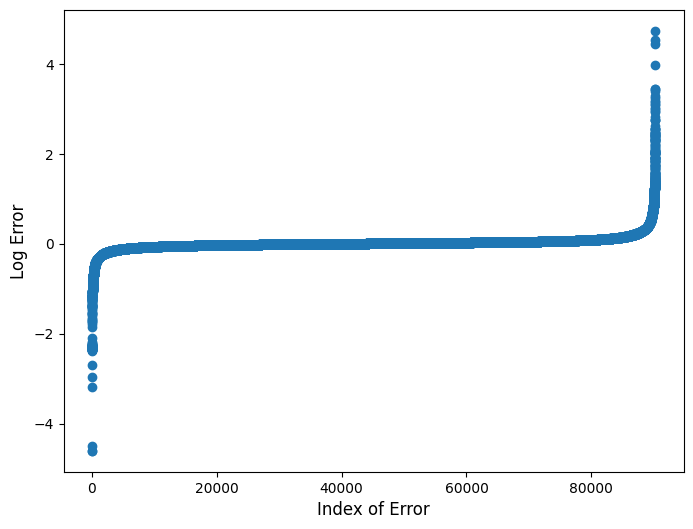

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(range(zillow.shape[0]),np.sort(zillow.logerror.values))
plt.xlabel('Index of Error', fontsize=12)
plt.ylabel('Log Error',fontsize=12)
plt.show()

Some outliers are present at the tail ends, let's try to remove the outliers

<AxesSubplot:xlabel='month', ylabel='count'>

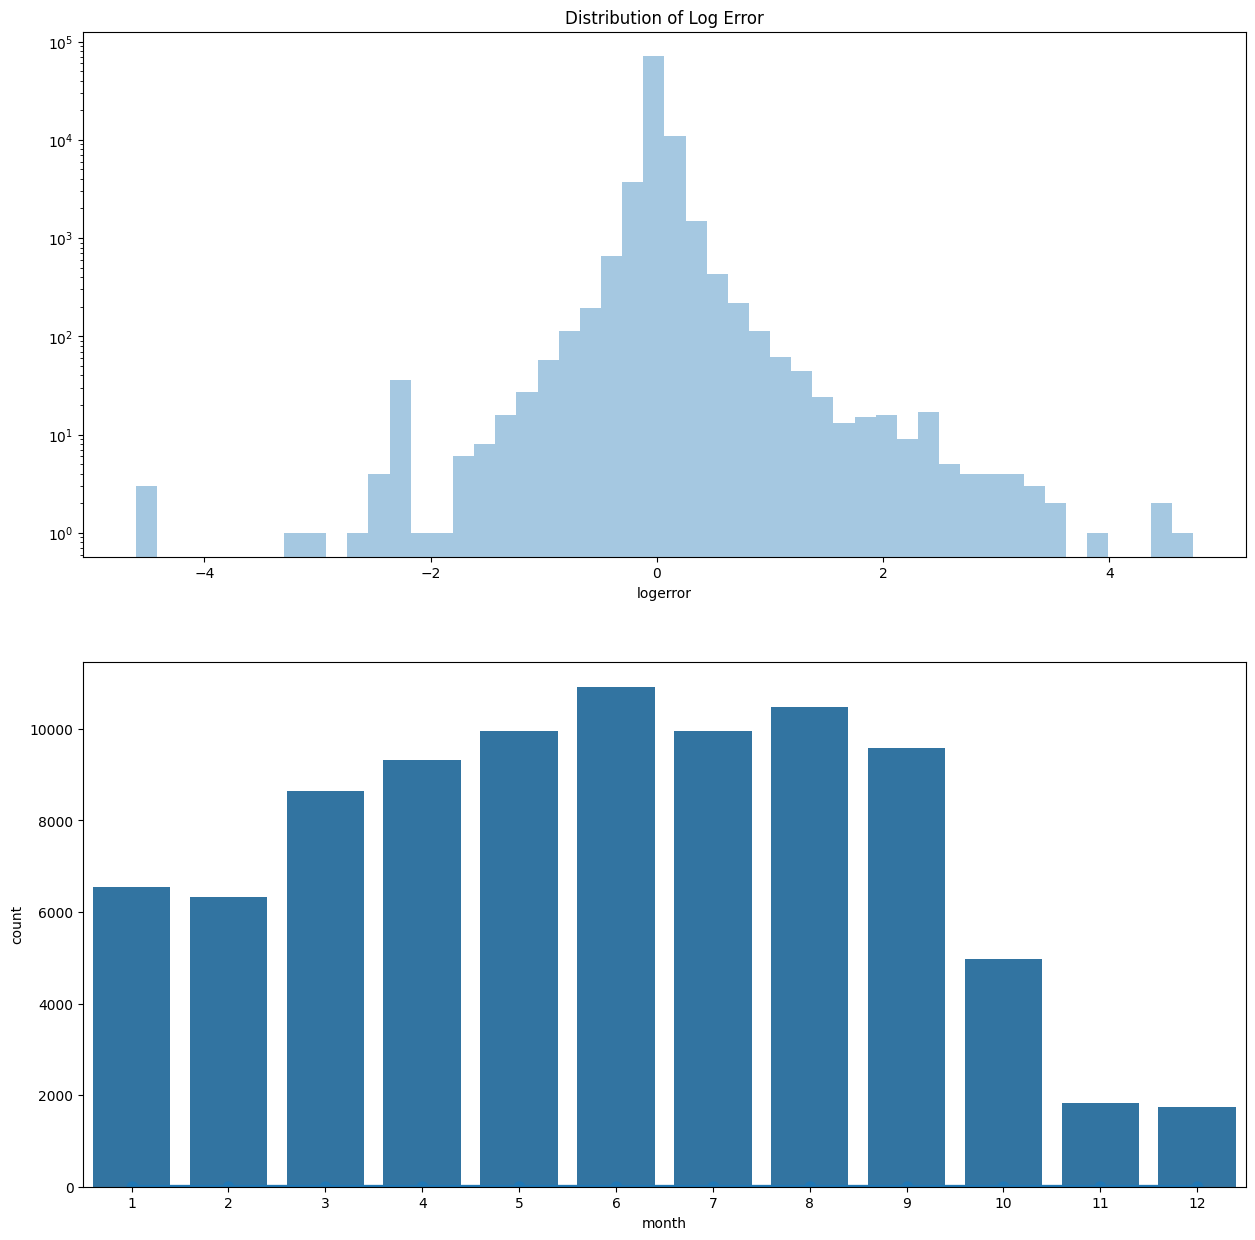

In [29]:
# Exploring Target Variable (logerror)
fig, (ax1, ax2) = plt.subplots(figsize=(15,15),nrows=2)

# Checking Distribution
sns.distplot(zillow['logerror'],kde=False,bins=50,ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Distribution of Log Error')

# Checking monthly sales
sns.countplot(x='month',data=zillow,ax=ax2)
sns.pointplot(x='month',y='logerror',data=monthly_error)


# Data Cleaning

In [30]:
missing = zillow.isnull().mean().sort_values(ascending=False).reset_index()
missing.columns=['variable','percentage']
missing.head()

,variable,percentage
0,buildingclasstypeid,1.000000
1,finishedsquarefeet13,0.999989
2,basementsqft,0.999989
3,storytypeid,0.999989
4,fireplaceflag,0.999978


<AxesSubplot:xlabel='percentage', ylabel='variable'>

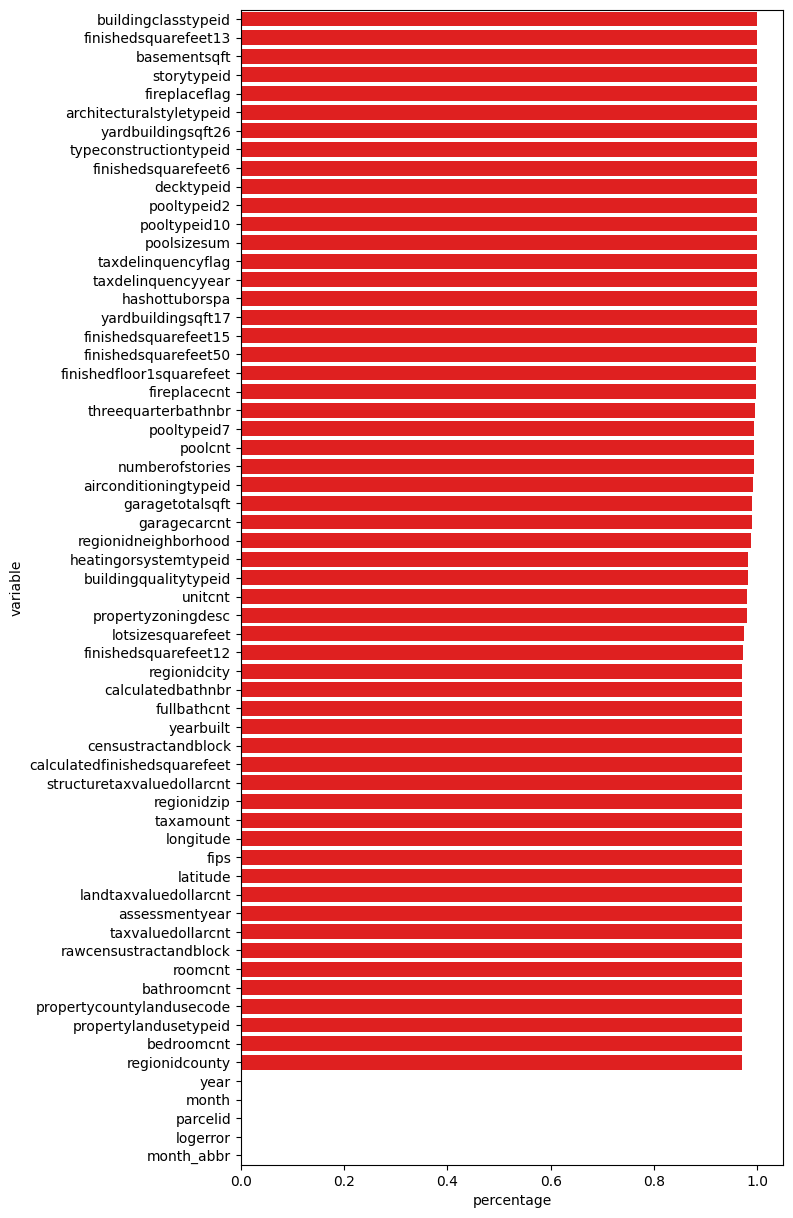

In [31]:
# Let's plot the missing variables
fix,ax = plt.subplots(figsize=(7,15))
sns.barplot(x='percentage',y='variable',data=missing,color='r')

Looks like majority of our data has the issue of missing more than 90% of our data, so let's try to remedy that do some label encoding and transformaions

In [42]:
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.metrics import mean_absolute_error
import warnings as w

In [43]:
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/train_2016_v2.csv', )
properties = pd.read_csv('/mnt/c/users/efazh/DataProblems/Datasets/Tabular/Zillow/property_2016.csv')

for c in properties.columns: # Converts all categorical values to numerical values via Label Encoding
    properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

train_df = train.merge(properties, how='left', on='parcelid') #Merged the old dataset with the converted properties set

# Machine Learning

### Train-Test Split

In [50]:
x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
x_test = properties.drop(['parcelid'], axis=1)
# printing out the shape        
print('Shape of train dataset: {}\nShape of test dataset: {}'.format(x_train.shape, x_test.shape))

# taking out potential outliers to fit our model better
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.42 ]
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = train_df["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)


Shape of train dataset: (88528, 57)
Shape of test dataset: (90274, 57)


In [53]:
# Parameters for XG Boosting
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

In [46]:
w.filterwarnings('ignore')

# Creating Cross-Validation Set
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=500,
                   early_stopping_rounds=5,
                   verbose_eval=10, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# training our model
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)
pred = model.predict(dtest)
y_pred=[]

# Printing out our MAE scores for the train and test sets
for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,10)))
y_pred=np.array(y_pred)

[0]	train-mae:0.05331	test-mae:0.05331
[10]	train-mae:0.05328	test-mae:0.05331
[11]	train-mae:0.05327	test-mae:0.05331
8


It looks like our MAE score is roughly average at the 0.05327 to 0.0533 range, which is good!

In [47]:
# Now that we have predicted our outputs, let's print them out into a .csv file
output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})

# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]

output.to_csv('sub.csv',index=False)

# Model Output

In [48]:
output_read = pd.read_csv('sub.csv')
output_read.head(10)

,201712,ParcelId,201610,201611,201612,201710,201711
0,0.011052,10754147,0.011052,0.011052,0.011052,0.011052,0.011052
1,0.009942,10759547,0.009942,0.009942,0.009942,0.009942,0.009942
2,-0.007624,10843547,-0.007624,-0.007624,-0.007624,-0.007624,-0.007624
3,0.008483,10859147,0.008483,0.008483,0.008483,0.008483,0.008483
4,0.004693,10879947,0.004693,0.004693,0.004693,0.004693,0.004693
5,0.003496,10898347,0.003496,0.003496,0.003496,0.003496,0.003496
6,-0.014692,10933547,-0.014692,-0.014692,-0.014692,-0.014692,-0.014692
7,0.006917,10940747,0.006917,0.006917,0.006917,0.006917,0.006917
8,0.009834,10954547,0.009834,0.009834,0.009834,0.009834,0.009834
9,0.009295,10976347,0.009295,0.009295,0.009295,0.009295,0.009295


### Model Comparison
- Our MAE Metric is roughly around the 0.05327 - 0.05331
- The Kaggle score that we recieved is around 0.0521